## Summary

In this final project, I extended my knowledge on Grover's algorithm by working out how to solve a real-life problem with many applications in scheduling, machine learning and networking - the four-color theorem. 
First, I created a superposition of all possible solutions by considering the constraints posed by a specific problem. Then, I used the Amplification and Grover functions from Qiskit to define and solve the problem. All this was possible due to the special properites that quantum gates have. The main ones used here were X, which proved to be very useful for negations, and CX, which, applied repetitively, helped me check whether two adjacent nodes on the graph had the same colour. After changing the number of iterations, it was possible to display (close to) only the correct solutions, by finding the optimal number of steps. After trying out a few examples with increasing complexity, I moved on to optimizing the initial algorithm by using the multi-controlled target gate. After that, I explored some applications of the algorithm in route planning. 

## Answers to the Key Questions

<b>1. When using Grover's algorithm, we do not get good results for too few *or* too many iterations. Rather, there is a "sweet spot" (a balanced number of iterations) right in the middle. Why is this?</b>

The answer to this question can be found very easily by considering the geometrical interpretation of Grover's algorithm. There are two types of states: wrong or right. Let's define the amplitudes of right and wrong states as follows:
$$\Phi_{wrong}=\frac{1}{\sqrt{|W|}}\sum_{i\in W} | i \rangle$$
$$\Phi_{right}=\frac{1}{\sqrt{|R|}}\sum_{j\in R} | j \rangle$$
We can also define a sort of uniform amplitude, which can be thought of as an average of the considered solutions (initially, the system starts in an equal superposition of all solutions, which then change)
$$\Phi_{uniform}=\frac{1}{\sqrt{|N|}}\sum_{k \in N} | k \rangle$$
We can think of this setup as an analog to the trigonometric circle: the X axis is $\Phi_{wrong}$ and the Y axis is $\Phi_{right}$. Therefore, $\Phi_{uniform}$ can be written like this:
$$\Phi_{uniform}= sin\theta  \Phi_{right} + cos\theta  \Phi_{wrong}  $$
where $\theta = arcsin \sqrt{\frac{|R|}{N}}$ and, if there is only one correct solution $\theta = arcsin \sqrt{\frac{1}{N}}$
What Grover's algorithm does is that it rotates the vector by $2\theta$ counterclockwise. What we want to achieve is to get this vector as close to $\Phi_{right}$ as possible. After $k$ iterations, we end up in the state
$$\Phi_{uniform}= sin{(2k+1)\theta} \Phi_{right} + cos{(2k+1)\theta}  \Phi_{wrong}  $$
Therefore, $(2k+1)\theta = \frac{\pi}{2}$, $k=\frac{\pi\sqrt{N}}{4}-\frac{1}{2}$ ($1<<N$). Therefore a smaller or bigger number than the optimal one does not get good results.

<b>2. How and why does having *multiple* correct answers change the number of iterations needed for Grover's algorithm?</b>

In the previous answer, let us not use the simplification that $|R|=1$ and let's calculate $k$. The result is $k=\frac{\pi}{4 \arcsin \sqrt{\frac{|R|}{N}}}-\frac{1}{2}$. Therefore, $k$ decreases the more correct solutions there are.

<b>3. The best classical algorithm that guarantees solutions to the 4 coloring problem has a Big-O complexity of $O(1.7272^n)$ where $n$ is the number of Countries to be colored (or Routes to be assigned planes). How does Grover's algorithm compare to this run time?
</b>

We have to compare $O(1.7272^n)$ and $O(\frac{\pi \sqrt{N}}{4})$. I made a graph in Desmos which helps us visualize the evolution of the two.

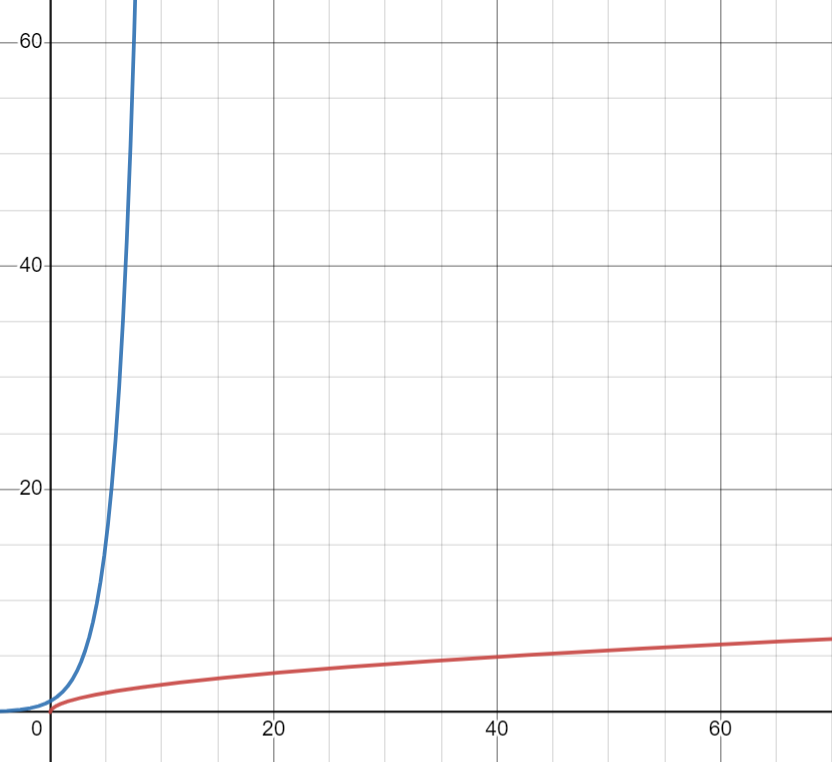


where the red line is Grover's algorithm. It can be therefore clearly seen that it is more efficient for any value of $n$.